<a href="https://colab.research.google.com/github/yashbodke-hub/work/blob/master/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
pwd

'/content'

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/My Drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
import nltk

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Input,LSTM,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### EDA

In [ ]:
df_true['is_fake']= 0
df_true.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df_fake['is_fake'] = 1
df_fake.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
df = pd.concat([df_true,df_fake]).reset_index(drop = True)

In [ ]:
df.tail()

,title,text,subject,date,is_fake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
df.drop(columns=['date'],inplace = True)

In [ ]:
df['original'] = df['title'] + " " + df['text']

In [ ]:
df['original'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['edu','from','re','subject','use'])

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    
    return result

In [ ]:
df['clean'] = df['original'].apply(preprocess)

In [ ]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
df['clean'][0]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [ ]:
#obtain total no of words

list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [ ]:
print(list_of_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(list_of_words)

9277072

In [ ]:
#total unique words

total_words = len(list(set(list_of_words)))


In [ ]:
df['clean_joined'] = df['clean'].apply(lambda x:" ".join(x))

In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

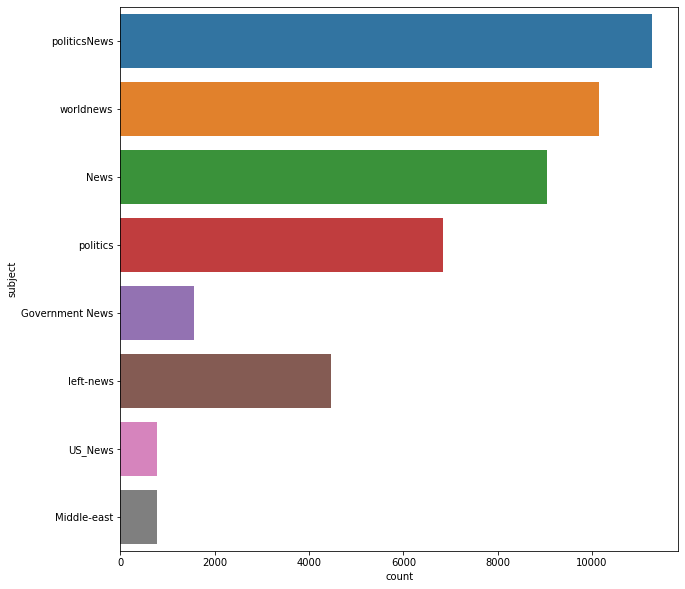

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'subject',data = df)

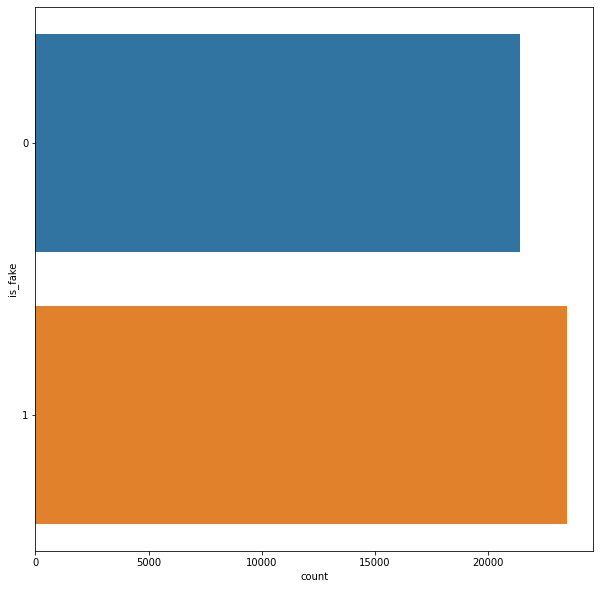

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'is_fake',data = df)

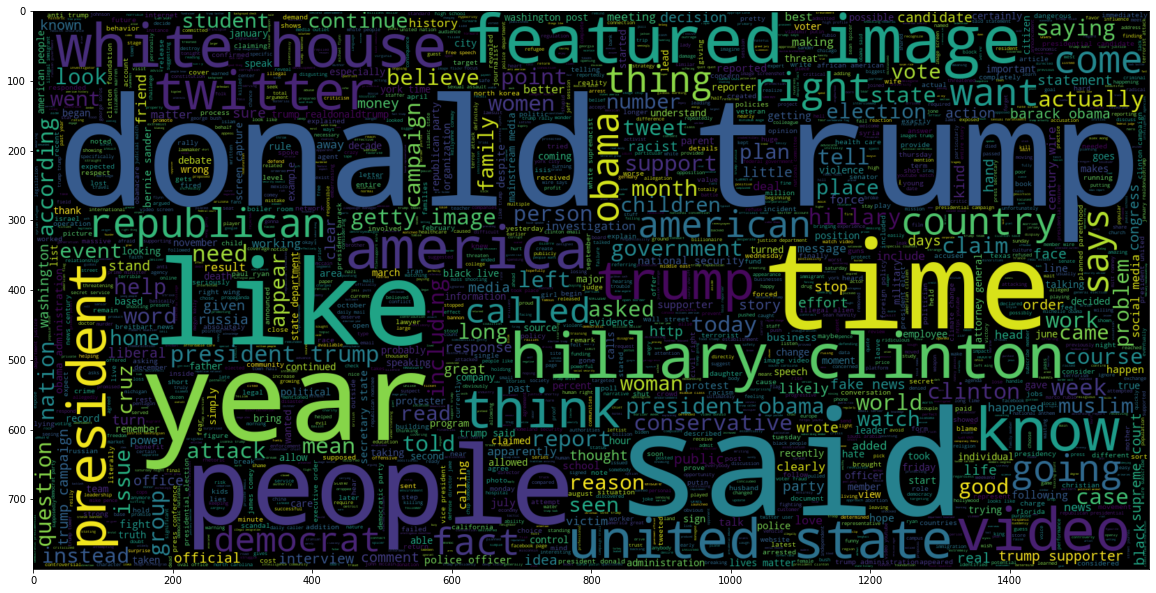

In [ ]:
#plot the wordcloud for text that is fake

plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,width = 1600, height = 800, stopwords=stop_words).generate(" ".join(df[df.is_fake == 1].clean_joined))

plt.imshow(wc,interpolation='bilinear')


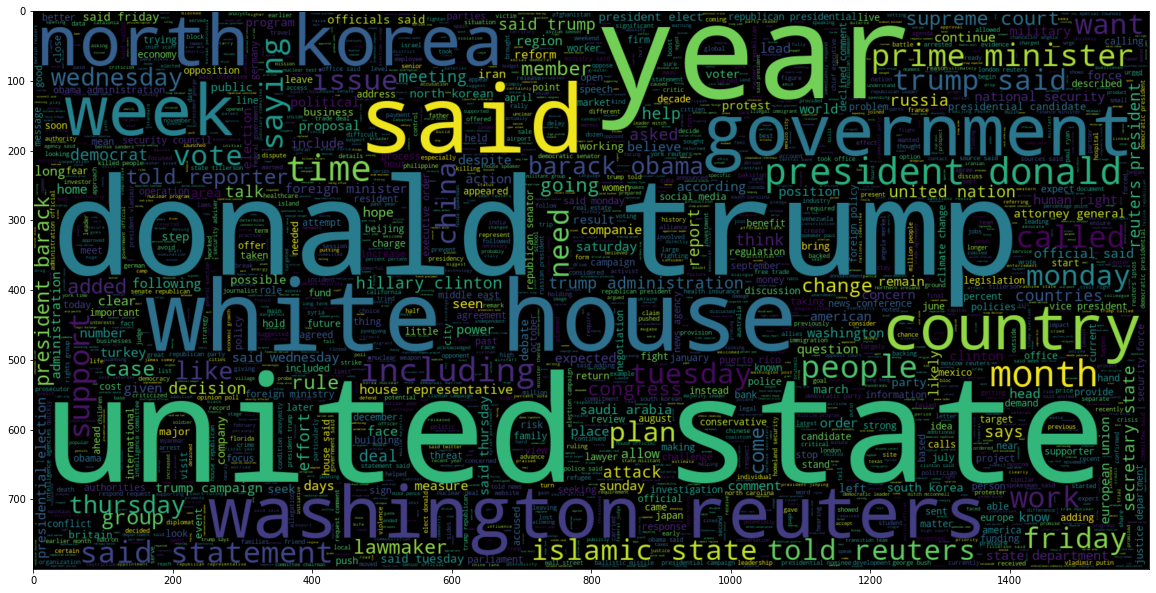

In [ ]:
#plot the wordcloud for text that is real
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,width = 1600, height = 800, stopwords=stop_words).generate(" ".join(df[df.is_fake == 0].clean_joined))

plt.imshow(wc,interpolation='bilinear')

In [ ]:
#length of maximum document
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print("maximum number of words in any doc is =", maxlen)

maximum number of words in any doc is = 4406


In [ ]:
#import plotly.express as px
#fig = px.histogram(x = len(nltk.word_tokenize(x) for x in df.clean_joined,nbins = 100))
#fig.show()

### Prepare data before model training

In [ ]:
#tokenization -> tokenizer allows us to vectorize text corpus by turning each text into sequence of intergers
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.clean_joined,df.is_fake,test_size = 0.3)

In [ ]:
from nltk import word_tokenize

In [ ]:
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(train_sequences)

31428

In [ ]:
len(test_sequences)

13470

In [ ]:
print("the encoded document \n",df.clean_joined[0],"\n is", train_sequences[0])

the encoded document 
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying 

### padding

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen=4405,padding = "post",truncating="post")
padded_test = pad_sequences(test_sequences,maxlen=4405,padding = "post",truncating="post")

In [ ]:
for i, doc in enumerate(padded_train[:2]):
    print("the padded encoding for document ", i + 1,"is ", doc)

the padded encoding for document  1 is  [ 396 1312 1599 ...    0    0    0]
the padded encoding for document  2 is  [7181  383 5417 ...    0    0    0]


In [ ]:
model = Sequential()

model.add(Embedding(total_words,output_dim= 128))

model.add(tf.keras.layers.Bidirectional(LSTM(128)))

model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         13914240  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,210,433
Trainable params: 14,210,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.asarray(y_train)

In [ ]:
#train the model
model.fit(padded_train,y_train,batch_size=64,validation_split=0.1,epochs = 2)

Epoch 1/2
442/442 [==============================] - 613s 1s/step - loss: 0.0488 - acc: 0.9805 - val_loss: 0.0053 - val_acc: 0.9987
Epoch 2/2
442/442 [==============================] - 614s 1s/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0084 - val_acc: 0.9975


In [ ]:
pred = model.predict(padded_test)

In [ ]:
prediction = []
for i in range(len(pred)):
  if pred[i].item() > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(list(y_test),prediction)

In [ ]:
print("model accuracy ",accuracy)

model accuracy  0.9979213066072754


In [ ]:
from sklearn.metrics import confusion_matrix

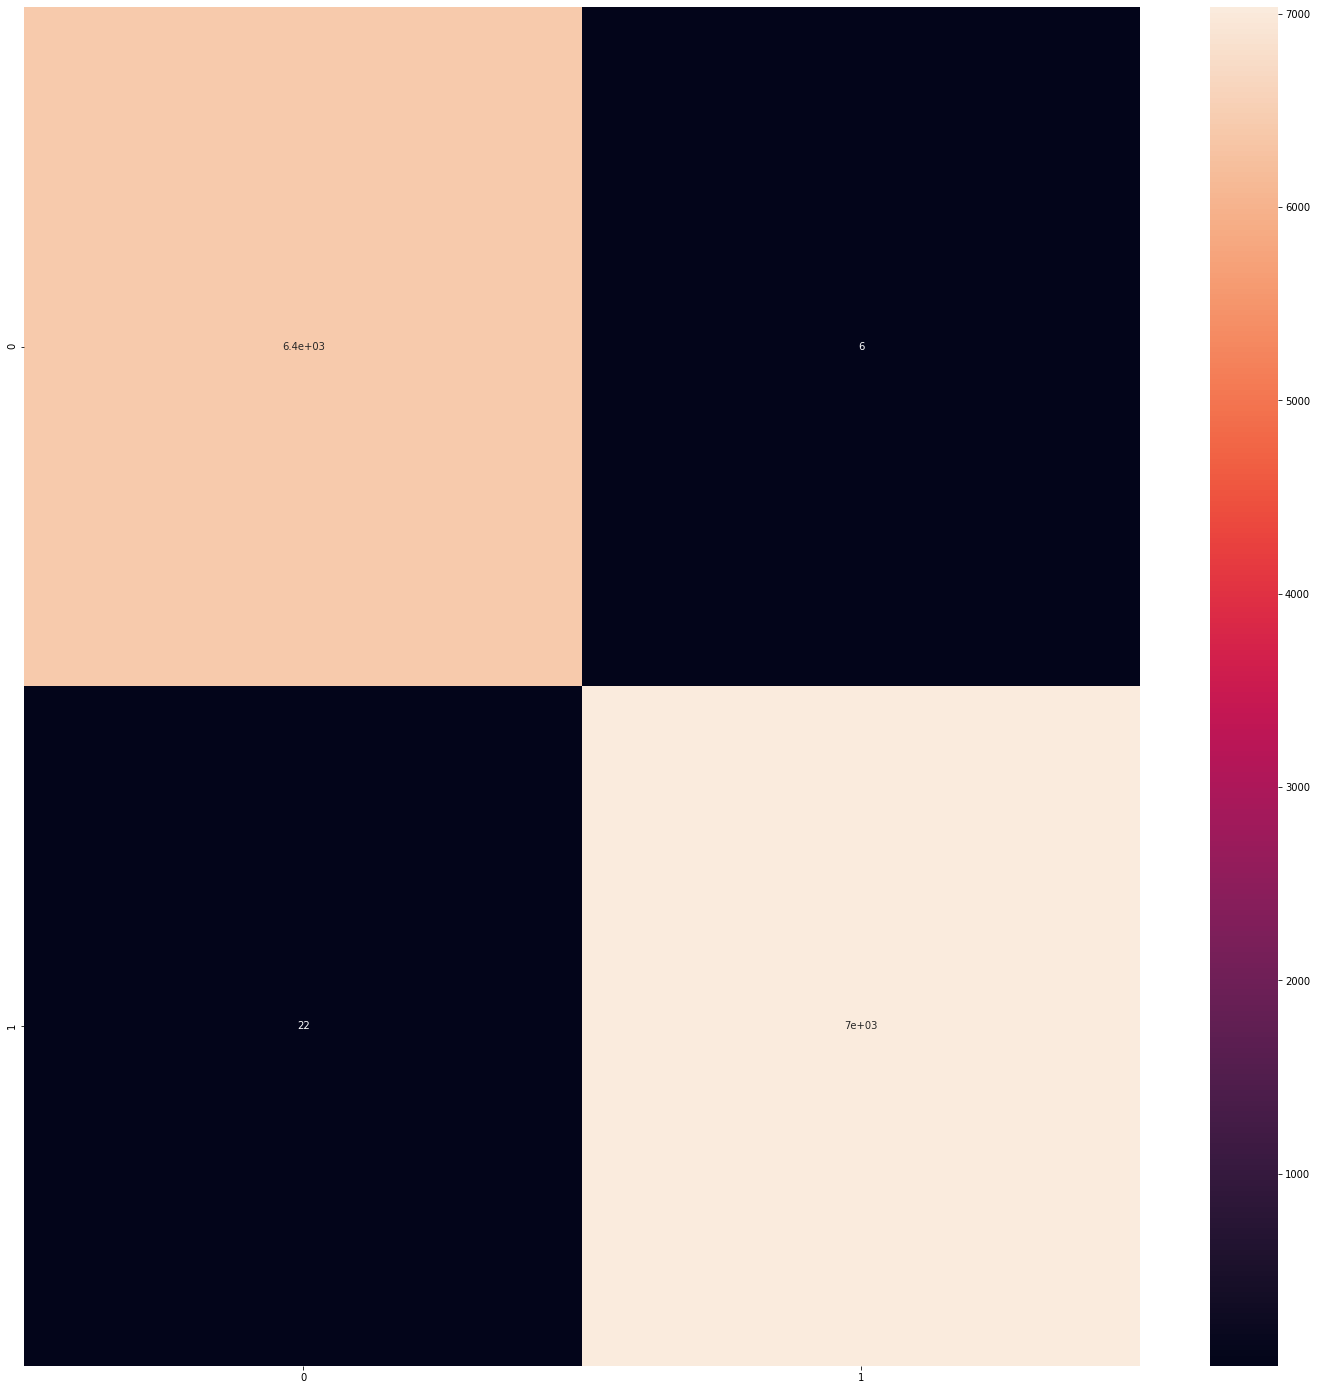

In [ ]:
cm = confusion_matrix(list(y_test),prediction)
plt.figure(figsize = (25,25))
sns.heatmap(cm,annot = True)